<a href="https://colab.research.google.com/github/Nishilhmodi/Codsoft-Internship/blob/main/Task_5_Creditcard_FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
##**Credit Card Fraud Detection**
---
---

Importing Required libraries...

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score

Importing Required dataset

In [ ]:
credit_card_df = pd.read_csv('/content/credit_card.csv')
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


**Exploratory Data Analytics**

---

In [ ]:
credit_card_df.shape

(11683, 31)

In [ ]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11683 entries, 0 to 11682
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11683 non-null  int64  
 1   V1      11683 non-null  float64
 2   V2      11683 non-null  float64
 3   V3      11683 non-null  float64
 4   V4      11683 non-null  float64
 5   V5      11683 non-null  float64
 6   V6      11683 non-null  float64
 7   V7      11683 non-null  float64
 8   V8      11682 non-null  float64
 9   V9      11682 non-null  float64
 10  V10     11682 non-null  float64
 11  V11     11682 non-null  float64
 12  V12     11682 non-null  float64
 13  V13     11682 non-null  float64
 14  V14     11682 non-null  float64
 15  V15     11682 non-null  float64
 16  V16     11682 non-null  float64
 17  V17     11682 non-null  float64
 18  V18     11682 non-null  float64
 19  V19     11682 non-null  float64
 20  V20     11682 non-null  float64
 21  V21     11682 non-null  float64
 22

In [ ]:
credit_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11682.000000,11682.000000,...,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000
mean,7719.909783,-0.218930,0.274366,0.897415,0.279525,-0.080074,0.140209,-0.112851,-0.051813,0.894175,...,-0.060863,-0.155319,-0.034390,0.017484,0.101885,0.070011,0.007466,0.000765,62.744623,0.004194
std,5979.605669,1.562304,1.305756,1.273424,1.467618,1.185154,1.305368,1.129205,1.238005,1.182044,...,0.903168,0.624101,0.508133,0.592007,0.429794,0.560325,0.406579,0.262175,179.692760,0.064632
min,0.000000,-27.670569,-34.607649,-21.405836,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.555808,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2468.500000,-0.986679,-0.258310,0.416652,-0.616876,-0.682463,-0.622072,-0.584757,-0.186380,0.183126,...,-0.268870,-0.545219,-0.172766,-0.332772,-0.146471,-0.347419,-0.080530,-0.015509,5.000000,0.000000
50%,6329.000000,-0.346841,0.261619,0.949690,0.213597,-0.181072,-0.148172,-0.090324,0.011643,0.880564,...,-0.130308,-0.129040,-0.044523,0.073057,0.139838,0.008005,-0.003818,0.015363,15.950000,0.000000
75%,11927.000000,1.159482,0.887528,1.616155,1.152661,0.347763,0.508783,0.438043,0.266868,1.570395,...,0.022916,0.234891,0.076603,0.402492,0.375979,0.417116,0.108253,0.073880,50.000000,0.000000
max,19929.000000,1.960497,9.067613,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,...,22.599543,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [ ]:
credit_card_df = credit_card_df.drop(['Time'], axis=1)

In [ ]:
credit_card_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_df.shape

(11683, 30)

In [ ]:
credit_card_df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
credit_card_df['V8'].fillna(credit_card_df['V8'].mean(), inplace=True)
credit_card_df['V9'].fillna(credit_card_df['V9'].mean(), inplace=True)
credit_card_df['V10'].fillna(credit_card_df['V10'].mean(), inplace=True)
credit_card_df['V11'].fillna(credit_card_df['V11'].mean(), inplace=True)
credit_card_df['V12'].fillna(credit_card_df['V12'].mean(), inplace=True)
credit_card_df['V13'].fillna(credit_card_df['V13'].mean(), inplace=True)
credit_card_df['V14'].fillna(credit_card_df['V14'].mean(), inplace=True)
credit_card_df['V15'].fillna(credit_card_df['V15'].mean(), inplace=True)
credit_card_df['V16'].fillna(credit_card_df['V16'].mean(), inplace=True)
credit_card_df['V17'].fillna(credit_card_df['V17'].mean(), inplace=True)
credit_card_df['V18'].fillna(credit_card_df['V18'].mean(), inplace=True)
credit_card_df['V19'].fillna(credit_card_df['V19'].mean(), inplace=True)
credit_card_df['V20'].fillna(credit_card_df['V20'].mean(), inplace=True)
credit_card_df['V21'].fillna(credit_card_df['V21'].mean(), inplace=True)
credit_card_df['V22'].fillna(credit_card_df['V22'].mean(), inplace=True)
credit_card_df['V23'].fillna(credit_card_df['V23'].mean(), inplace=True)
credit_card_df['V24'].fillna(credit_card_df['V24'].mean(), inplace=True)
credit_card_df['V25'].fillna(credit_card_df['V25'].mean(), inplace=True)
credit_card_df['V26'].fillna(credit_card_df['V26'].mean(), inplace=True)
credit_card_df['V27'].fillna(credit_card_df['V27'].mean(), inplace=True)
credit_card_df['V28'].fillna(credit_card_df['V28'].mean(), inplace=True)
credit_card_df['Amount'].fillna(credit_card_df['Amount'].mean(), inplace=True)
credit_card_df['Class'].fillna(credit_card_df['Class'].mode()[0], inplace=True)
credit_card_df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# remove outlier using IQR method
Q1 = credit_card_df.quantile(0.25)
Q3 = credit_card_df.quantile(0.75)
IQR = Q3 - Q1
new_df = credit_card_df[~((credit_card_df < (Q1 - 1.5 * IQR)) |(credit_card_df > (Q3 + 1.5 * IQR))).any(axis=1)]
new_df.shape

(6123, 30)

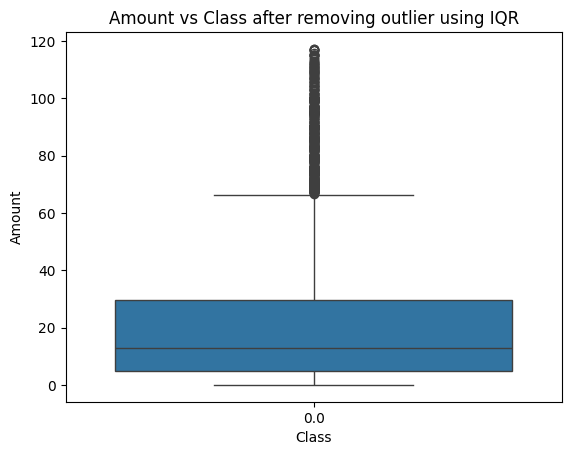

In [ ]:
sns.boxplot(x = 'Class',y = 'Amount',data=new_df)
plt.title('Amount vs Class after removing outlier using IQR')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

Deviding the data into the independent and dependent data.

In [ ]:
x = credit_card_df.drop('Class', axis=1)
y = credit_card_df['Class']

In [ ]:
print(x)

             V1        V2        V3        V4        V5        V6        V7  \
0     -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1      1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
...         ...       ...       ...       ...       ...       ...       ...   
11678  1.208802 -0.401943  0.901086 -0.697416 -1.014073 -0.281932 -0.828187   
11679 -1.723814  1.389327  1.411353 -0.716019 -1.561864  1.505156 -2.024937   
11680  1.192037 -0.357840  1.002156 -0.558666 -1.017703 -0.321732 -0.780201   
11681 -7.773912  4.249596 -5.985636  1.450199 -4.709726 -1.302327 -2.807678   
11682  1.024814 -1.179948  1.702954 -0.833752 -1.598620  1.270610 -1.786000   

             V8        V9       V10  ...       V20 

In [ ]:
print(y)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
11678    0.0
11679    0.0
11680    0.0
11681    0.0
11682    0.0
Name: Class, Length: 11683, dtype: float64


In [ ]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
data = pd.DataFrame(x_scaled,columns=x.columns)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.730284,-0.265870,1.287083,0.748612,-0.217911,0.246821,0.312136,0.121586,-0.448743,0.312749,...,0.393189,0.047122,0.694108,-0.149746,0.083527,0.062022,-0.462496,0.310156,-0.083226,0.483508
1,0.903056,-0.006292,-0.574016,0.114905,0.118211,-0.170511,0.030154,0.110602,-0.972636,0.089965,...,-0.161497,-0.182609,-0.774544,0.267035,-0.603643,0.151913,0.099743,-0.040461,0.053249,-0.334236
2,-0.729354,-1.236524,0.687777,0.068314,-0.357036,1.271949,0.800874,0.241933,-2.038026,0.413740,...,0.866657,0.342004,1.485460,1.857552,-1.193948,-0.999463,-0.373221,-0.154520,-0.230845,1.758237
3,-0.478379,-0.351989,0.703314,-0.778721,0.058869,0.848068,0.310374,0.346756,-1.930042,0.186784,...,-0.401988,-0.052528,0.257340,-0.306897,-2.015452,1.269301,-0.521063,0.135918,0.231517,0.338136
4,-0.601255,0.462106,0.511480,0.084159,-0.276026,-0.033929,0.625061,-0.176686,-0.064669,0.885145,...,0.665137,0.056951,1.528084,-0.202855,0.209109,-0.716438,0.771549,0.521361,0.817799,0.040324


In [ ]:
credit_card_df['Class'].value_counts()

Class
0.0    11634
1.0       49
Name: count, dtype: int64

In [ ]:
rs = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rs.fit_resample(x,y)
print(y_resampled.value_counts())

Class
0.0    49
1.0    49
Name: count, dtype: int64


**Appling Different Models on Dataset**

---

In [ ]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2,random_state=42)

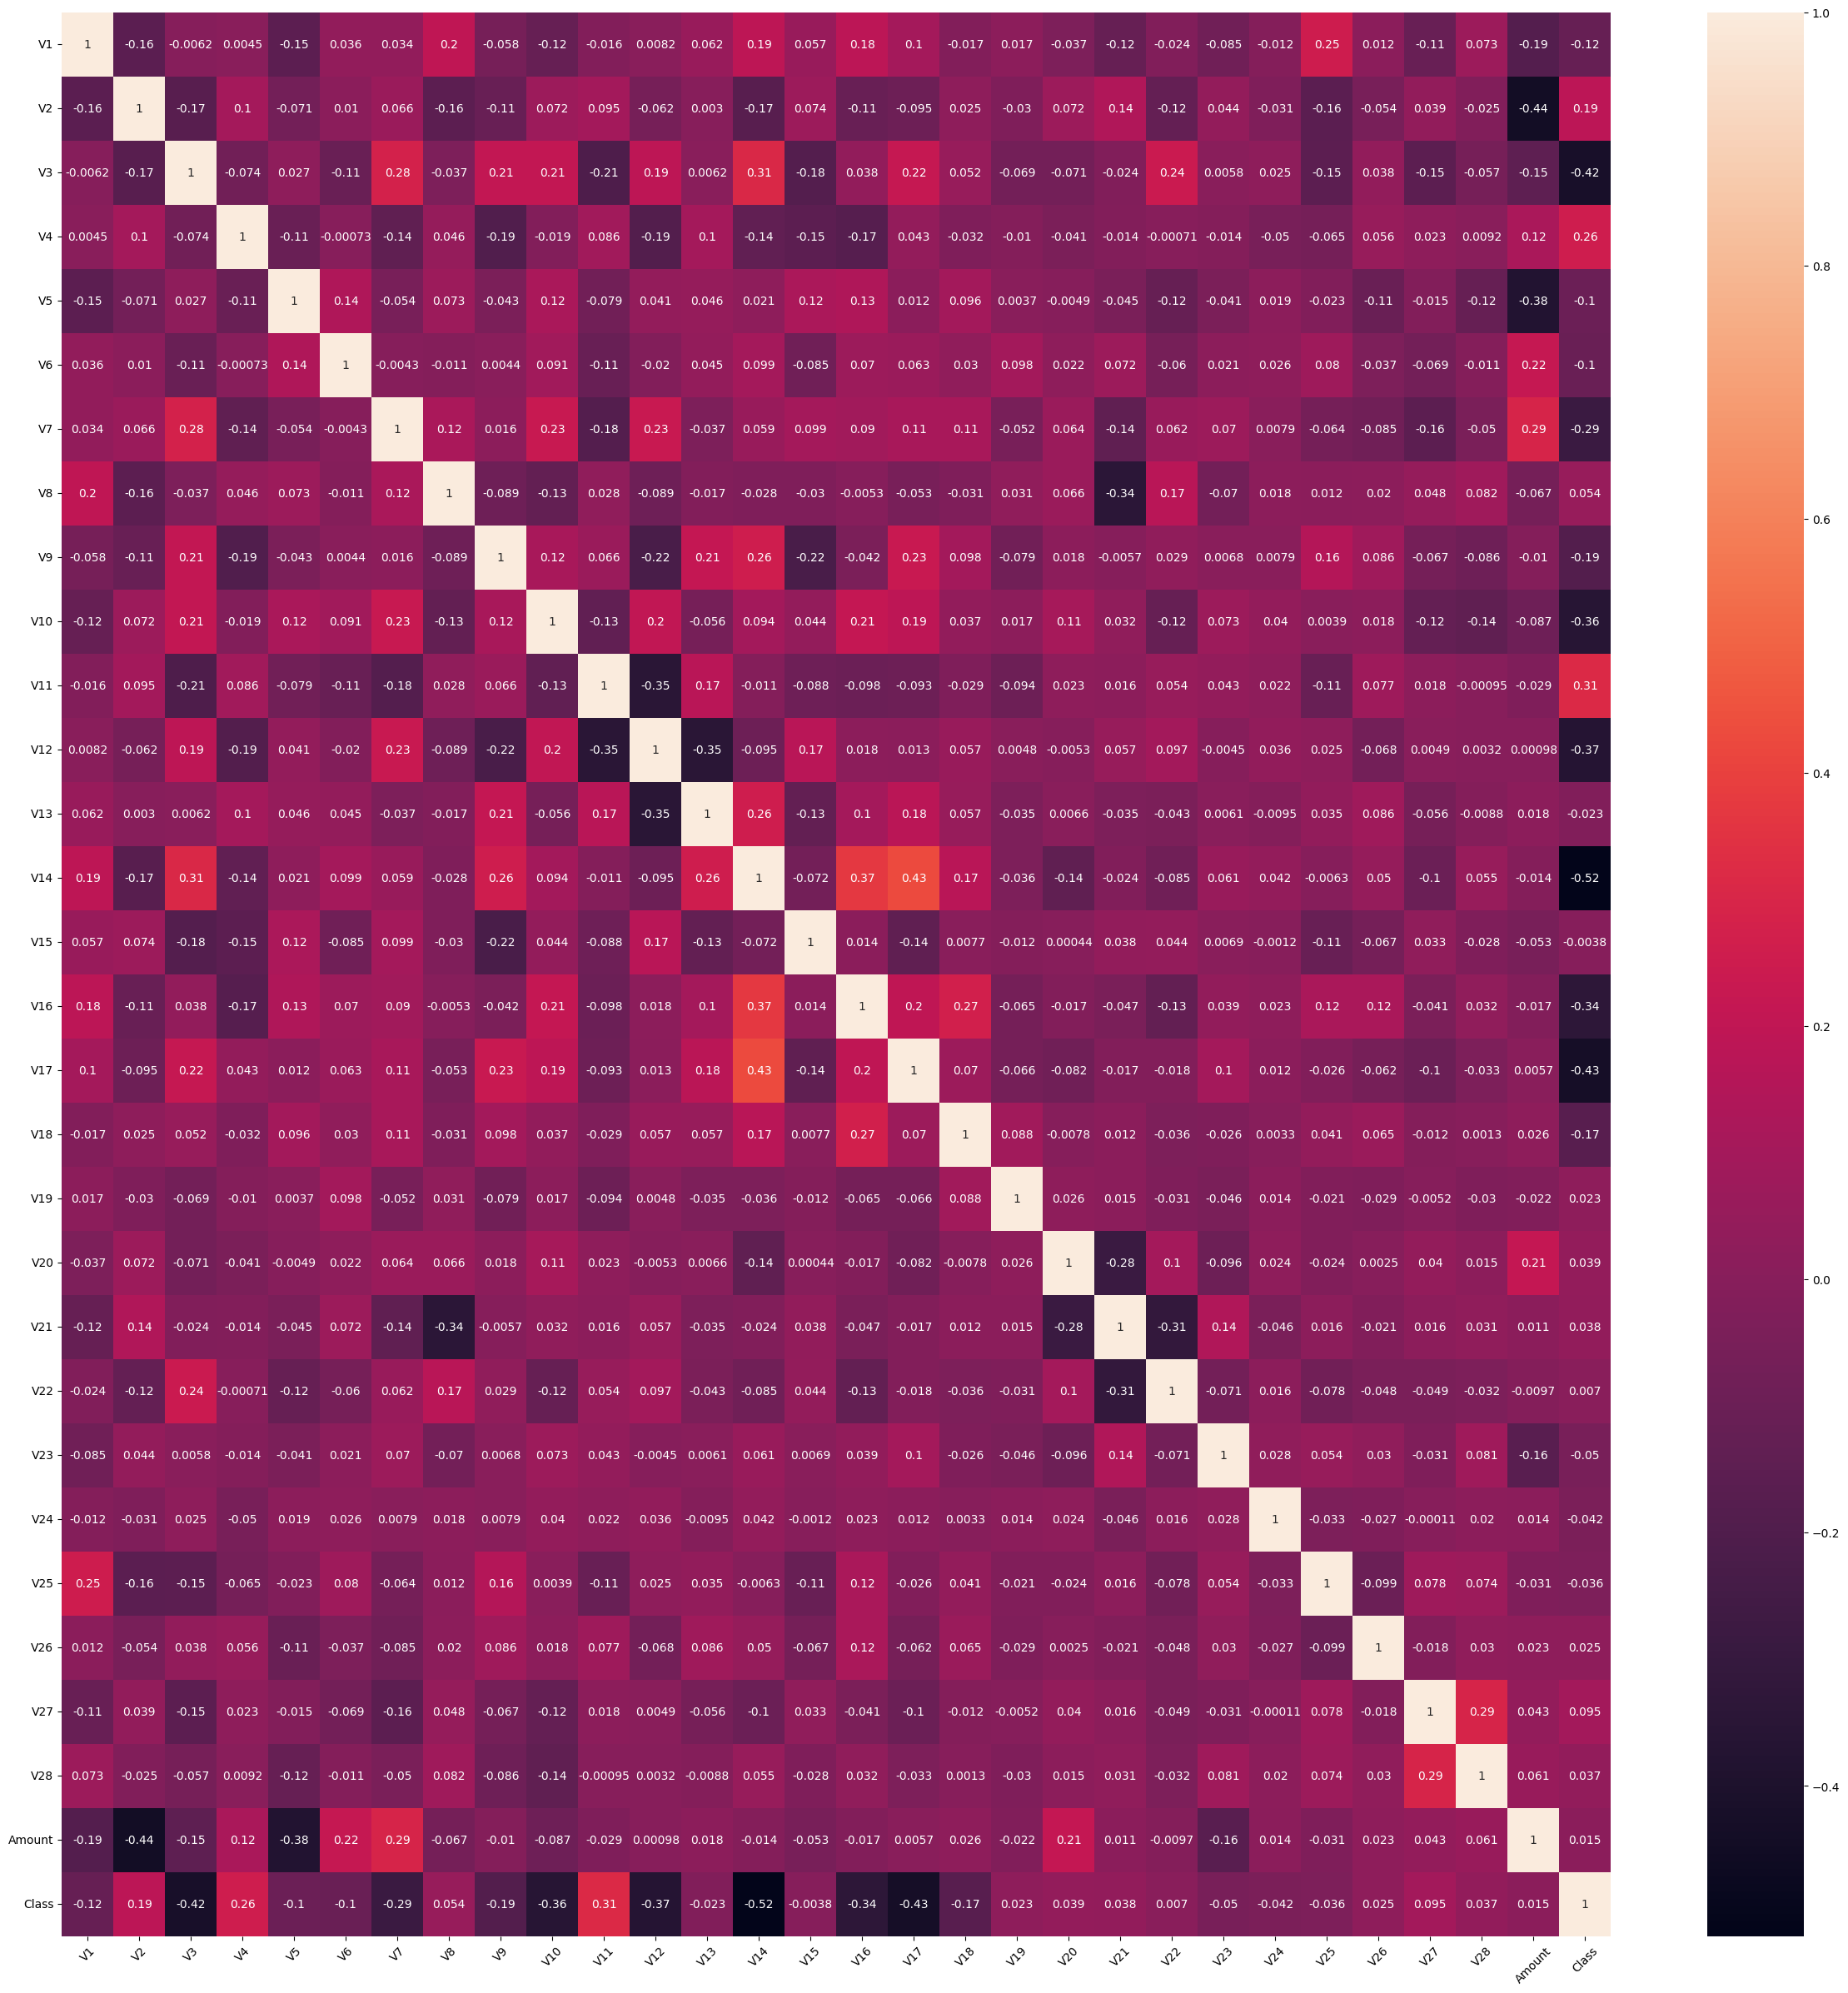

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(credit_card_df.corr(),annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

---

**DecisionTreeClassifier**

---

In [ ]:
from sklearn.tree import DecisionTreeClassifier
df_tree = {
    'max_depth': [i for i in range(1,10)],
    'criterion': ['gini','entropy'],
    'splitter': ['best','random']
}
grid_search = GridSearchCV(DecisionTreeClassifier(),df_tree,cv=5)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
Desicion_model = DecisionTreeClassifier(criterion: 'gini', max_depth: 2, splitter: 'best')
Desicion_model.fit(x_train,y_train)

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}


DecisionTreeClassifier()

In [ ]:
y_pred = Desicion_model.predict(x_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


ac : 0.9978600470789643
precision : 0.7111111111111111
recall : 0.8205128205128205
f1 : 0.7619047619047619
confusion_matrix :


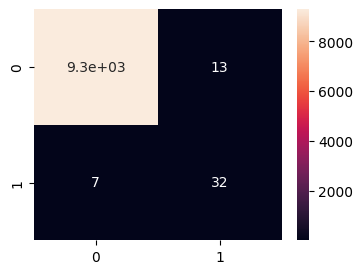

In [ ]:
print("ac :",accuracy_score(y_test,Desicion_model.predict(x_test)))
print("precision :",precision_score(y_test,Desicion_model.predict(x_test)))
print("recall :",recall_score(y_test,Desicion_model.predict(x_test)))
print("f1 :",f1_score(y_test,Desicion_model.predict(x_test)))
print("confusion_matrix :")
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,Desicion_model.predict(x_test)),annot=True)
plt.show()

---

**SVC**

---

In [ ]:
from sklearn.svm import SVC
df_svm = {
    'kernel': ['rbf','linear'],
    'C': [i for i in range(1,10)]
}
grid_search = GridSearchCV(SVC(),df_svm,cv=5)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
svm_model = SVC(C=1,kernel='linear')
svm_model.fit(x_train,y_train)

{'C': 1, 'kernel': 'linear'}


SVC()

In [ ]:
y_pred = svm_model.predict(x_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


ac : 0.9958270918039803
precision : 0.0
recall : 0.0
f1 : 0.0
confusion_matrix :


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


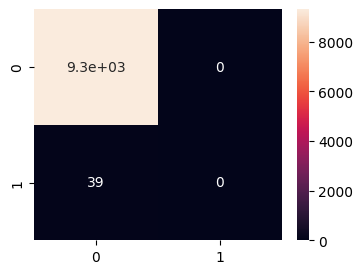

In [ ]:
print("ac :",accuracy_score(y_test,svm_model.predict(x_test)))
print("precision :",precision_score(y_test,svm_model.predict(x_test)))
print("recall :",recall_score(y_test,svm_model.predict(x_test)))
print("f1 :",f1_score(y_test,svm_model.predict(x_test)))
print("confusion_matrix :")
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,svm_model.predict(x_test)),annot=True)
plt.show()

---

**RandomForestClassifier**

---

In [ ]:
from sklearn.ensemble import RandomForestClassifier
df_forest = {
    'n_estimators': [i for i in range(1,10)],
    'criterion': ['gini','entropy'],
    'max_depth': [i for i in range(1,10)]
}
grid_search = GridSearchCV(RandomForestClassifier(),df_forest,cv=5)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
forest_model = RandomForestClassifier(criterion='gini',max_depth=9,n_estimators=7)
forest_model.fit(x_train,y_train)

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 7}


RandomForestClassifier()

In [ ]:
y_pred = forest_model.predict(x_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


ac : 0.9987160282473786
precision : 0.8648648648648649
recall : 0.8205128205128205
f1 : 0.8421052631578947
confusion_matrix :


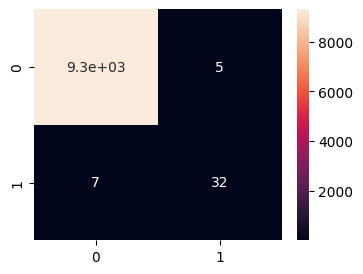

In [ ]:
print("ac :",accuracy_score(y_test,forest_model.predict(x_test)))
print("precision :",precision_score(y_test,forest_model.predict(x_test)))
print("recall :",recall_score(y_test,forest_model.predict(x_test)))
print("f1 :",f1_score(y_test,forest_model.predict(x_test)))
print("confusion_matrix :")
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,forest_model.predict(x_test)),annot=True)
plt.show()

---

**KNeighborsClassifier**

---

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
df_knn = {
    'n_neighbors': [i for i in range(1,10)],
    'weights': ['uniform','distance'],
    'algorithm': ['auto','ball_tree','kd_tree','brute']
}
grid_search = GridSearchCV(KNeighborsClassifier(),df_knn,cv=5)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
knn_model = KNeighborsClassifier(algorithm='auto',n_neighbors=1,weights='uniform')
knn_model.fit(x_train,y_train)

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(x_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


ac : 0.9986090306013268
precision : 0.9642857142857143
recall : 0.6923076923076923
f1 : 0.8059701492537313
confusion_matrix :


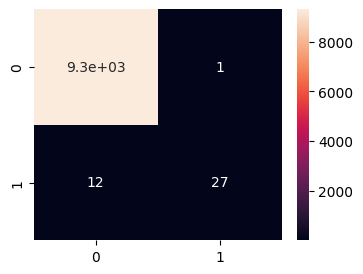

In [ ]:
print("ac :",accuracy_score(y_test,knn_model.predict(x_test)))
print("precision :",precision_score(y_test,knn_model.predict(x_test)))
print("recall :",recall_score(y_test,knn_model.predict(x_test)))
print("f1 :",f1_score(y_test,knn_model.predict(x_test)))
print("confusion_matrix :")
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,knn_model.predict(x_test)),annot=True)
plt.show()

---

**GradientBoostingClassifier**

---

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
df_boost = {
    'n_estimators': [i for i in range(1,10)],
    'learning_rate': [i for i in range(1,10)],
    'max_depth': [i for i in range(1,10)]
}
grid_search = GridSearchCV(GradientBoostingClassifier(),df_boost,cv=5)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
boost_model = GradientBoostingClassifier(learning_rate: 1, max_depth: 4, n_estimators: 6)
boost_model.fit(x_train,y_train)

{'learning_rate': 1, 'max_depth': 4, 'n_estimators': 6}


GradientBoostingClassifier()

In [ ]:
y_pred = boost_model.predict(x_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


ac : 0.9977530494329124
precision : 0.6956521739130435
recall : 0.8205128205128205
f1 : 0.7529411764705882
confusion_matrix :


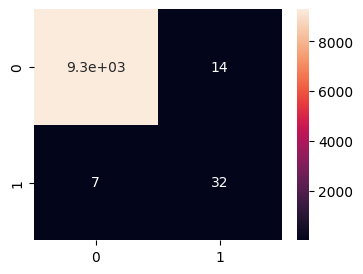

In [ ]:
print("ac :",accuracy_score(y_test,boost_model.predict(x_test)))
print("precision :",precision_score(y_test,boost_model.predict(x_test)))
print("recall :",recall_score(y_test,boost_model.predict(x_test)))
print("f1 :",f1_score(y_test,boost_model.predict(x_test)))
print("confusion_matrix :")
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,boost_model.predict(x_test)),annot=True)
plt.show()